# 3DeeCellTracker Demo: Train StarDist3D

This notebook demonstrates how to train a StarDist3D model for cell segmentation. It is a revised version of a notebook originally from the StarDist project (URL: https://github.com/stardist/stardist/blob/master/examples/3D/2_training.ipynb), which includes programs based on a wrapper written by Chentao Wen for the StarDist package.

The demo data used in this notebook can be found in the "worm1_stardist_training_data" folder, which can be downloaded from https://osf.io/pgr95/."

**The basic procedures:**
- A. Import packages
- B. Load training data
- C. Configure StarDist3D model
- D. Check data augmentation
- E. Train StarDist3D
- F. Optimize a threshold for segmentation
- G. Confirm the segmentation results with trainied model

Please shutdown all other training/prediction notebooks before running this notebook (as those might occupy the GPU memory otherwise).

## A. Import packages

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import CellTracker.stardistwrapper as sdw

/tmp/ipykernel_16504/3320912416.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


2023-04-24 15:51:41.524991: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## B. Load training data
This code block is used to load raw images and the corresponding cell annotations for training the StarDist model.

### Parameters
- `path_train_images`: A string specifying the file path to the raw images.
- `path_train_labels`: A string specifying the file path to the annotated label images (where each cell has a different label).

### Notes
>To specify the file paths for the training images and labels, you need to provide a string that tells the program where to find the images and labels. This string should include a special pattern that matches all files with the extension .tif in the directories where the images and labels are located. This pattern is called a Unix glob pattern and it looks like this: *.tif.

>For example, if your training images are located in a directory called "images" and your labels are located in a directory called "labels", you can specify the file paths like this:

```
    path_train_images = './images/*.tif'
    path_train_labels = './labels/*.tif'
```

>This tells the program to look for all files with the extension .tif in the "images" and "labels" directories.

>The "./" refers to the current working directory that contains this notebook.

>In addition, the training images and labels must be saved as 3D image stacks in .tif format, which is required by the "stardist" package used in this notebook. The corresponding image and label should have the same filename but in different directories. For example, if the image file is called "image001.tif", then the corresponding label file should also be called "image001.tif". You can check the downloaded demo data to see examples of how the images and labels are named.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.98it/s]


number of images:   2
- training:         1
- validation:       1
X[0].shape=(21, 512, 1024)


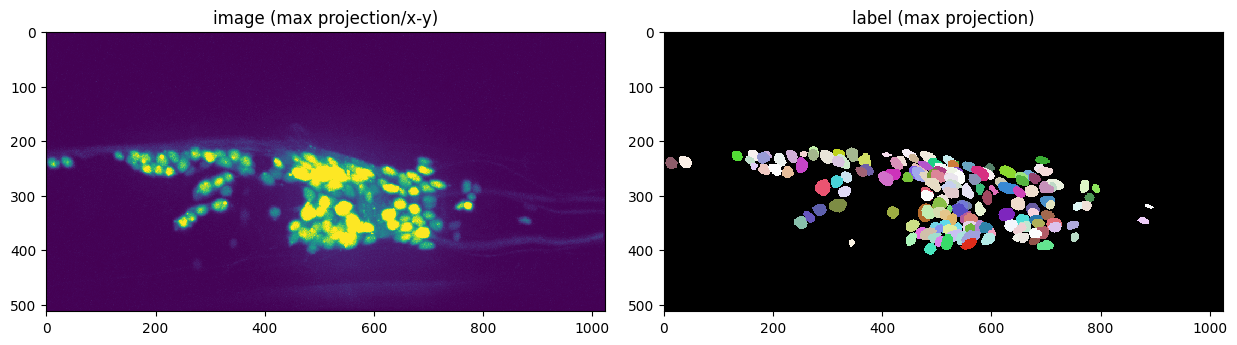

In [2]:
path_train_images = './worm1_stardist_training_data/raw/*.tif'
path_train_labels = './worm1_stardist_training_data/label/*.tif'

X, Y, X_trn, Y_trn, X_val, Y_val, n_channel = \
    sdw.load_training_images(path_train_images, path_train_labels, max_projection=True)

## C. Configure StarDist3D model
This code block create a StarDist3D model for training.

### Parameters
- `model_name`: A string specifying the filename to save the trained StarDist3D model. This filename will be used to load the model later.

In [3]:
model_name="stardist_worm1"

model = sdw.configure(Y, n_channel, model_name=model_name)

base_model.py (149): output path for model already exists, files may be overwritten: /home/wen/PycharmProjects/3DeeCellTracker/Examples/use_stardist/stardist_models/stardist_worm1
2023-04-24 15:51:42.491918: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1


empirical anisotropy of labeled objects = (6.0, 1.0909090909090908, 1.0)
div_by=(4, 8, 8)
n_dim: 3
axes: ZYXC
n_channel_in: 1
n_channel_out: 97
train_checkpoint: weights_best.h5
train_checkpoint_last: weights_last.h5
train_checkpoint_epoch: weights_now.h5
n_rays: 96
grid: (1, 2, 2)
anisotropy: (6.0, 1.0909090909090908, 1.0)
backbone: unet
rays_json: {'name': 'Rays_GoldenSpiral', 'kwargs': {'n': 96, 'anisotropy': (6.0, 1.0909090909090908, 1.0)}}
n_classes: None
unet_n_depth: 2
unet_kernel_size: (3, 3, 3)
unet_n_filter_base: 32
unet_n_conv_per_depth: 2
unet_pool: (2, 2, 2)
unet_activation: relu
unet_last_activation: relu
unet_batch_norm: False
unet_dropout: 0.0
unet_prefix: 
net_conv_after_unet: 128
net_input_shape: (None, None, None, 1)
net_mask_shape: (None, None, None, 1)
train_patch_size: [20, 112, 112]
train_background_reg: 0.0001
train_foreground_only: 0.9
train_sample_cache: True
train_dist_loss: mae
train_loss_weights: (1, 0.2)
train_class_weights: (1, 1)
train_epochs: 400
train_

2023-04-24 15:51:42.521945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-24 15:51:42.522338: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 Ti computeCapability: 8.6
coreClock: 1.665GHz coreCount: 80 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 849.46GiB/s
2023-04-24 15:51:42.522355: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-24 15:51:42.523420: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-24 15:51:42.523447: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-04-24 15:51:42.523824: I tensorflow/stream_exe

Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.537581, nms_thresh=0.3.


2023-04-24 15:51:42.976892: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3504000000 Hz
2023-04-24 15:51:43.095356: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-24 15:51:43.419322: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2023-04-24 15:51:43.811595: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-24 15:51:44.108666: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


median object size:      [ 4. 22. 24.]
network field of view :  [26 46 46]


## D. Check data augmentation
Data augmentation is used to create additional data that can improve the accuracy of the StarDist model. This code block displays some samples of the augmented images and labels for verification purposes. By checking the augmented data, you can ensure that the generated images and labels are reasonable.

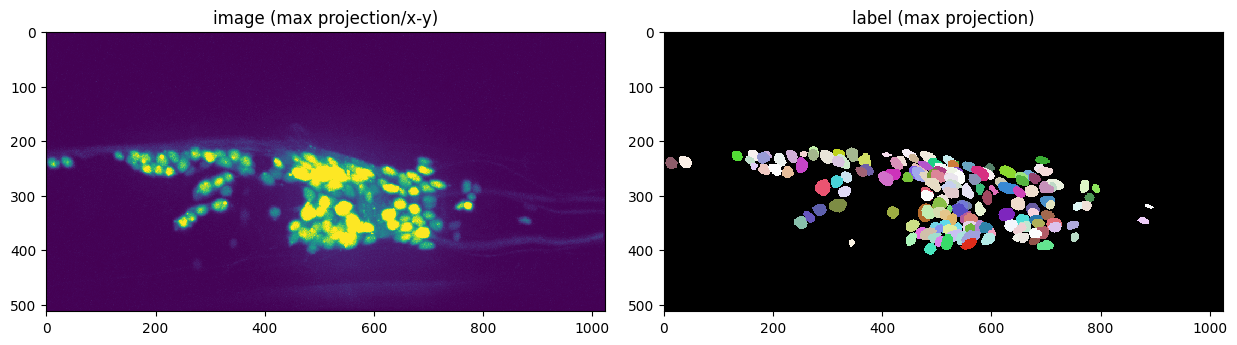

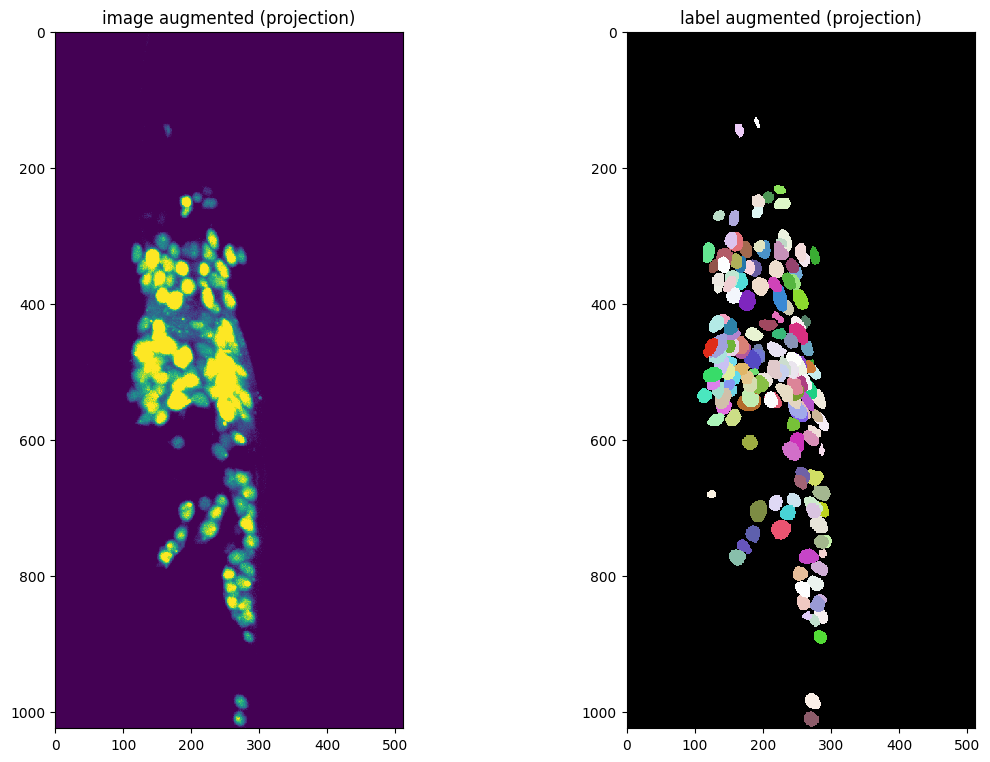

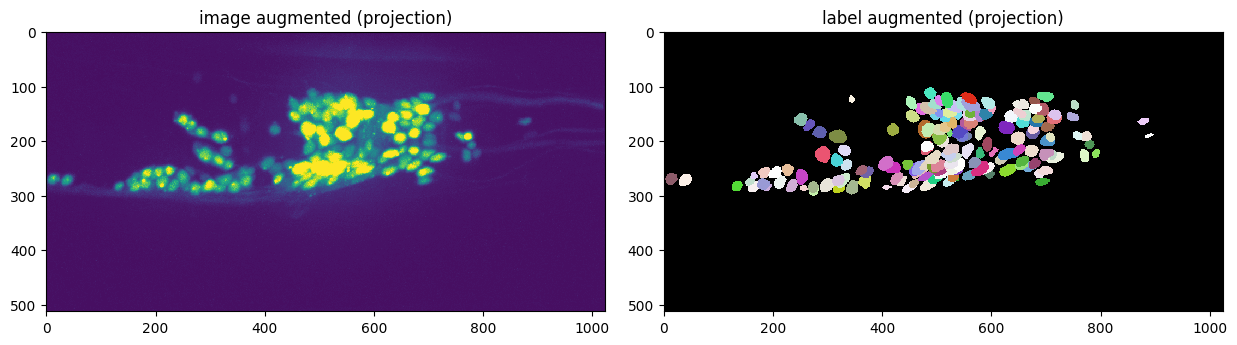

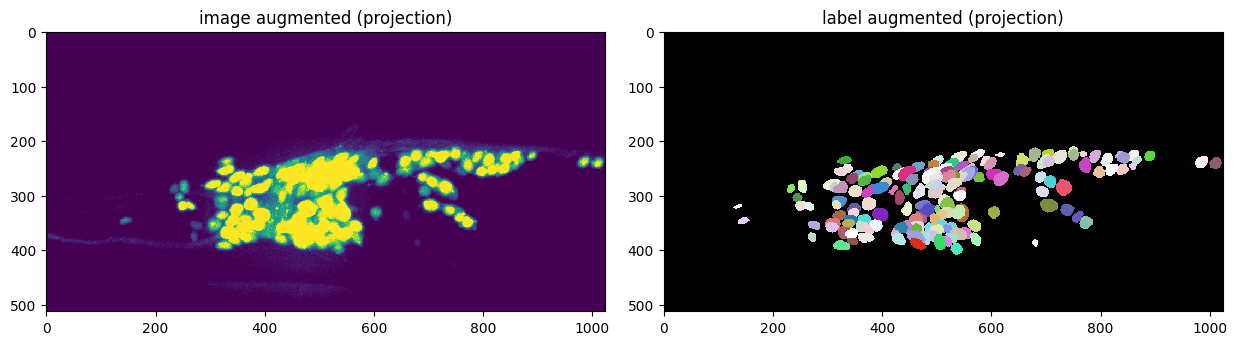

In [4]:
# plot some augmented examples
img, lbl = X[0],Y[0]
sdw.plot_img_label_max_projection(img, lbl)
for _ in range(3):
    img_aug, lbl_aug = sdw.augmenter(img,lbl)
    sdw.plot_img_label_max_projection(img_aug, lbl_aug, img_title="image augmented (projection)", lbl_title="label augmented (projection)")

## E. Train StarDist3D

### Parameters
- `epochs`: An integer specifying the number of epochs for training. A larger number of epochs will require a longer training time. The default value of 500 is a reasonable choice.

In [5]:
epochs=500

model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=sdw.augmenter, epochs=500)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x7fd608ea1430>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x7fd608ea1430>. Note that functions defined in certain environments, like the interactive 

Epoch 17/500
100/100 [==============================] - 7s 66ms/step - loss: 0.3573 - prob_loss: 0.0306 - dist_loss: 1.6338 - prob_kld: 0.0072 - dist_relevant_mae: 1.6334 - dist_relevant_mse: 5.7272 - dist_dist_iou_metric: 0.6308 - val_loss: 0.2388 - val_prob_loss: 0.0083 - val_dist_loss: 1.1525 - val_prob_kld: 0.0019 - val_dist_relevant_mae: 1.1521 - val_dist_relevant_mse: 2.6900 - val_dist_dist_iou_metric: 0.7183
Epoch 18/500
100/100 [==============================] - 7s 67ms/step - loss: 0.3481 - prob_loss: 0.0306 - dist_loss: 1.5875 - prob_kld: 0.0072 - dist_relevant_mae: 1.5872 - dist_relevant_mse: 5.4619 - dist_dist_iou_metric: 0.6358 - val_loss: 0.2489 - val_prob_loss: 0.0086 - val_dist_loss: 1.2013 - val_prob_kld: 0.0022 - val_dist_relevant_mae: 1.2009 - val_dist_relevant_mse: 2.8929 - val_dist_dist_iou_metric: 0.6912
Epoch 19/500
100/100 [==============================] - 7s 67ms/step - loss: 0.3277 - prob_loss: 0.0306 - dist_loss: 1.4858 - prob_kld: 0.0072 - dist_relevant_mae

Epoch 37/500
100/100 [==============================] - 7s 67ms/step - loss: 0.2982 - prob_loss: 0.0275 - dist_loss: 1.3535 - prob_kld: 0.0055 - dist_relevant_mae: 1.3531 - dist_relevant_mse: 4.0420 - dist_dist_iou_metric: 0.6744 - val_loss: 0.2268 - val_prob_loss: 0.0079 - val_dist_loss: 1.0948 - val_prob_kld: 0.0014 - val_dist_relevant_mae: 1.0945 - val_dist_relevant_mse: 2.5051 - val_dist_dist_iou_metric: 0.7306
Epoch 38/500
100/100 [==============================] - 7s 67ms/step - loss: 0.3039 - prob_loss: 0.0310 - dist_loss: 1.3645 - prob_kld: 0.0060 - dist_relevant_mae: 1.3641 - dist_relevant_mse: 4.0306 - dist_dist_iou_metric: 0.6927 - val_loss: 0.2889 - val_prob_loss: 0.0084 - val_dist_loss: 1.4025 - val_prob_kld: 0.0020 - val_dist_relevant_mae: 1.4022 - val_dist_relevant_mse: 3.5244 - val_dist_dist_iou_metric: 0.6428
Epoch 39/500
100/100 [==============================] - 7s 66ms/step - loss: 0.2895 - prob_loss: 0.0265 - dist_loss: 1.3151 - prob_kld: 0.0048 - dist_relevant_mae

100/100 [==============================] - 7s 66ms/step - loss: 0.2288 - prob_loss: 0.0268 - dist_loss: 1.0103 - prob_kld: 0.0035 - dist_relevant_mae: 1.0100 - dist_relevant_mse: 2.3964 - dist_dist_iou_metric: 0.7487 - val_loss: 0.1715 - val_prob_loss: 0.0073 - val_dist_loss: 0.8209 - val_prob_kld: 8.6021e-04 - val_dist_relevant_mae: 0.8206 - val_dist_relevant_mse: 1.5581 - val_dist_dist_iou_metric: 0.7864
Epoch 76/500
100/100 [==============================] - 7s 66ms/step - loss: 0.2255 - prob_loss: 0.0268 - dist_loss: 0.9937 - prob_kld: 0.0033 - dist_relevant_mae: 0.9934 - dist_relevant_mse: 2.2923 - dist_dist_iou_metric: 0.7634 - val_loss: 0.1754 - val_prob_loss: 0.0072 - val_dist_loss: 0.8411 - val_prob_kld: 7.8020e-04 - val_dist_relevant_mae: 0.8408 - val_dist_relevant_mse: 1.6567 - val_dist_dist_iou_metric: 0.7831
Epoch 77/500
100/100 [==============================] - 7s 67ms/step - loss: 0.2318 - prob_loss: 0.0270 - dist_loss: 1.0238 - prob_kld: 0.0038 - dist_relevant_mae: 1.0

100/100 [==============================] - 7s 66ms/step - loss: 0.2216 - prob_loss: 0.0268 - dist_loss: 0.9738 - prob_kld: 0.0033 - dist_relevant_mae: 0.9735 - dist_relevant_mse: 2.1567 - dist_dist_iou_metric: 0.7587 - val_loss: 0.1461 - val_prob_loss: 0.0071 - val_dist_loss: 0.6951 - val_prob_kld: 6.6043e-04 - val_dist_relevant_mae: 0.6949 - val_dist_relevant_mse: 1.0930 - val_dist_dist_iou_metric: 0.8184
Epoch 114/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1994 - prob_loss: 0.0235 - dist_loss: 0.8794 - prob_kld: 0.0026 - dist_relevant_mae: 0.8792 - dist_relevant_mse: 1.8252 - dist_dist_iou_metric: 0.7736 - val_loss: 0.1373 - val_prob_loss: 0.0070 - val_dist_loss: 0.6511 - val_prob_kld: 6.2726e-04 - val_dist_relevant_mae: 0.6509 - val_dist_relevant_mse: 0.9925 - val_dist_dist_iou_metric: 0.8325
Epoch 115/500
100/100 [==============================] - 7s 67ms/step - loss: 0.1993 - prob_loss: 0.0254 - dist_loss: 0.8696 - prob_kld: 0.0027 - dist_relevant_mae: 0

100/100 [==============================] - 7s 67ms/step - loss: 0.1791 - prob_loss: 0.0236 - dist_loss: 0.7777 - prob_kld: 0.0023 - dist_relevant_mae: 0.7775 - dist_relevant_mse: 1.4642 - dist_dist_iou_metric: 0.7844 - val_loss: 0.1299 - val_prob_loss: 0.0069 - val_dist_loss: 0.6150 - val_prob_kld: 4.9884e-04 - val_dist_relevant_mae: 0.6148 - val_dist_relevant_mse: 0.9160 - val_dist_dist_iou_metric: 0.8401
Epoch 152/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1944 - prob_loss: 0.0262 - dist_loss: 0.8412 - prob_kld: 0.0026 - dist_relevant_mae: 0.8410 - dist_relevant_mse: 1.6246 - dist_dist_iou_metric: 0.7875 - val_loss: 0.1420 - val_prob_loss: 0.0070 - val_dist_loss: 0.6750 - val_prob_kld: 5.7253e-04 - val_dist_relevant_mae: 0.6748 - val_dist_relevant_mse: 1.0210 - val_dist_dist_iou_metric: 0.8275
Epoch 153/500
100/100 [==============================] - 7s 67ms/step - loss: 0.1933 - prob_loss: 0.0294 - dist_loss: 0.8198 - prob_kld: 0.0029 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1848 - prob_loss: 0.0306 - dist_loss: 0.7711 - prob_kld: 0.0026 - dist_relevant_mae: 0.7709 - dist_relevant_mse: 1.4162 - dist_dist_iou_metric: 0.8118 - val_loss: 0.1368 - val_prob_loss: 0.0071 - val_dist_loss: 0.6487 - val_prob_kld: 6.8998e-04 - val_dist_relevant_mae: 0.6485 - val_dist_relevant_mse: 0.9027 - val_dist_dist_iou_metric: 0.8364
Epoch 190/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1789 - prob_loss: 0.0267 - dist_loss: 0.7609 - prob_kld: 0.0022 - dist_relevant_mae: 0.7607 - dist_relevant_mse: 1.3648 - dist_dist_iou_metric: 0.8121 - val_loss: 0.1449 - val_prob_loss: 0.0069 - val_dist_loss: 0.6900 - val_prob_kld: 5.0098e-04 - val_dist_relevant_mae: 0.6898 - val_dist_relevant_mse: 1.0536 - val_dist_dist_iou_metric: 0.8127
Epoch 191/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1843 - prob_loss: 0.0294 - dist_loss: 0.7746 - prob_kld: 0.0025 - dist_relevant_mae: 0

100/100 [==============================] - 7s 67ms/step - loss: 0.1716 - prob_loss: 0.0235 - dist_loss: 0.7403 - prob_kld: 0.0022 - dist_relevant_mae: 0.7401 - dist_relevant_mse: 1.3013 - dist_dist_iou_metric: 0.8122 - val_loss: 0.1311 - val_prob_loss: 0.0072 - val_dist_loss: 0.6198 - val_prob_kld: 7.5000e-04 - val_dist_relevant_mae: 0.6197 - val_dist_relevant_mse: 0.8790 - val_dist_dist_iou_metric: 0.8246
Epoch 228/500
100/100 [==============================] - 7s 67ms/step - loss: 0.1761 - prob_loss: 0.0253 - dist_loss: 0.7539 - prob_kld: 0.0022 - dist_relevant_mae: 0.7537 - dist_relevant_mse: 1.3539 - dist_dist_iou_metric: 0.8117 - val_loss: 0.1277 - val_prob_loss: 0.0070 - val_dist_loss: 0.6035 - val_prob_kld: 5.8421e-04 - val_dist_relevant_mae: 0.6033 - val_dist_relevant_mse: 0.8266 - val_dist_dist_iou_metric: 0.8464
Epoch 229/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1747 - prob_loss: 0.0278 - dist_loss: 0.7343 - prob_kld: 0.0023 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1612 - prob_loss: 0.0225 - dist_loss: 0.6936 - prob_kld: 0.0018 - dist_relevant_mae: 0.6934 - dist_relevant_mse: 1.1550 - dist_dist_iou_metric: 0.8229 - val_loss: 0.1134 - val_prob_loss: 0.0069 - val_dist_loss: 0.5326 - val_prob_kld: 4.5638e-04 - val_dist_relevant_mae: 0.5325 - val_dist_relevant_mse: 0.6569 - val_dist_dist_iou_metric: 0.8595
Epoch 266/500
100/100 [==============================] - 7s 67ms/step - loss: 0.1680 - prob_loss: 0.0248 - dist_loss: 0.7159 - prob_kld: 0.0020 - dist_relevant_mae: 0.7157 - dist_relevant_mse: 1.2477 - dist_dist_iou_metric: 0.8201 - val_loss: 0.1158 - val_prob_loss: 0.0068 - val_dist_loss: 0.5447 - val_prob_kld: 3.9939e-04 - val_dist_relevant_mae: 0.5445 - val_dist_relevant_mse: 0.6863 - val_dist_dist_iou_metric: 0.8539
Epoch 267/500
100/100 [==============================] - 7s 67ms/step - loss: 0.1622 - prob_loss: 0.0233 - dist_loss: 0.6946 - prob_kld: 0.0019 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1612 - prob_loss: 0.0252 - dist_loss: 0.6798 - prob_kld: 0.0018 - dist_relevant_mae: 0.6796 - dist_relevant_mse: 1.1115 - dist_dist_iou_metric: 0.8306 - val_loss: 0.1178 - val_prob_loss: 0.0070 - val_dist_loss: 0.5543 - val_prob_kld: 5.3394e-04 - val_dist_relevant_mae: 0.5542 - val_dist_relevant_mse: 0.7205 - val_dist_dist_iou_metric: 0.8520
Epoch 304/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1609 - prob_loss: 0.0268 - dist_loss: 0.6708 - prob_kld: 0.0020 - dist_relevant_mae: 0.6707 - dist_relevant_mse: 1.0912 - dist_dist_iou_metric: 0.8353 - val_loss: 0.1155 - val_prob_loss: 0.0069 - val_dist_loss: 0.5433 - val_prob_kld: 4.4452e-04 - val_dist_relevant_mae: 0.5431 - val_dist_relevant_mse: 0.6961 - val_dist_dist_iou_metric: 0.8556
Epoch 305/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1556 - prob_loss: 0.0231 - dist_loss: 0.6627 - prob_kld: 0.0017 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1701 - prob_loss: 0.0261 - dist_loss: 0.7203 - prob_kld: 0.0022 - dist_relevant_mae: 0.7201 - dist_relevant_mse: 1.2495 - dist_dist_iou_metric: 0.8160 - val_loss: 0.1133 - val_prob_loss: 0.0070 - val_dist_loss: 0.5314 - val_prob_kld: 6.0326e-04 - val_dist_relevant_mae: 0.5313 - val_dist_relevant_mse: 0.6414 - val_dist_dist_iou_metric: 0.8546
Epoch 342/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1801 - prob_loss: 0.0261 - dist_loss: 0.7699 - prob_kld: 0.0031 - dist_relevant_mae: 0.7697 - dist_relevant_mse: 1.3715 - dist_dist_iou_metric: 0.8095 - val_loss: 0.1248 - val_prob_loss: 0.0070 - val_dist_loss: 0.5894 - val_prob_kld: 5.3724e-04 - val_dist_relevant_mae: 0.5892 - val_dist_relevant_mse: 0.7994 - val_dist_dist_iou_metric: 0.8437
Epoch 343/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1778 - prob_loss: 0.0269 - dist_loss: 0.7545 - prob_kld: 0.0032 - dist_relevant_mae: 0

100/100 [==============================] - 7s 67ms/step - loss: 0.1682 - prob_loss: 0.0246 - dist_loss: 0.7181 - prob_kld: 0.0022 - dist_relevant_mae: 0.7179 - dist_relevant_mse: 1.2298 - dist_dist_iou_metric: 0.8178 - val_loss: 0.1304 - val_prob_loss: 0.0073 - val_dist_loss: 0.6158 - val_prob_kld: 8.4660e-04 - val_dist_relevant_mae: 0.6156 - val_dist_relevant_mse: 0.8002 - val_dist_dist_iou_metric: 0.8404
Epoch 380/500
100/100 [==============================] - 7s 67ms/step - loss: 0.1638 - prob_loss: 0.0263 - dist_loss: 0.6876 - prob_kld: 0.0021 - dist_relevant_mae: 0.6874 - dist_relevant_mse: 1.1346 - dist_dist_iou_metric: 0.8314 - val_loss: 0.1153 - val_prob_loss: 0.0070 - val_dist_loss: 0.5419 - val_prob_kld: 5.3096e-04 - val_dist_relevant_mae: 0.5418 - val_dist_relevant_mse: 0.6800 - val_dist_dist_iou_metric: 0.8519
Epoch 381/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1596 - prob_loss: 0.0240 - dist_loss: 0.6782 - prob_kld: 0.0018 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1438 - prob_loss: 0.0232 - dist_loss: 0.6030 - prob_kld: 0.0014 - dist_relevant_mae: 0.6029 - dist_relevant_mse: 0.8889 - dist_dist_iou_metric: 0.8505 - val_loss: 0.1021 - val_prob_loss: 0.0068 - val_dist_loss: 0.4762 - val_prob_kld: 4.0251e-04 - val_dist_relevant_mae: 0.4760 - val_dist_relevant_mse: 0.5488 - val_dist_dist_iou_metric: 0.8741
Epoch 418/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1510 - prob_loss: 0.0275 - dist_loss: 0.6179 - prob_kld: 0.0018 - dist_relevant_mae: 0.6177 - dist_relevant_mse: 0.9489 - dist_dist_iou_metric: 0.8420 - val_loss: 0.1035 - val_prob_loss: 0.0068 - val_dist_loss: 0.4834 - val_prob_kld: 3.7288e-04 - val_dist_relevant_mae: 0.4833 - val_dist_relevant_mse: 0.5586 - val_dist_dist_iou_metric: 0.8707
Epoch 419/500
100/100 [==============================] - 7s 67ms/step - loss: 0.1524 - prob_loss: 0.0276 - dist_loss: 0.6239 - prob_kld: 0.0018 - dist_relevant_mae: 0

100/100 [==============================] - 7s 65ms/step - loss: 0.1453 - prob_loss: 0.0254 - dist_loss: 0.5991 - prob_kld: 0.0016 - dist_relevant_mae: 0.5990 - dist_relevant_mse: 0.9059 - dist_dist_iou_metric: 0.8435 - val_loss: 0.0989 - val_prob_loss: 0.0069 - val_dist_loss: 0.4602 - val_prob_kld: 4.4019e-04 - val_dist_relevant_mae: 0.4600 - val_dist_relevant_mse: 0.5046 - val_dist_dist_iou_metric: 0.8771
Epoch 456/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1463 - prob_loss: 0.0259 - dist_loss: 0.6022 - prob_kld: 0.0017 - dist_relevant_mae: 0.6020 - dist_relevant_mse: 0.9056 - dist_dist_iou_metric: 0.8475 - val_loss: 0.1015 - val_prob_loss: 0.0068 - val_dist_loss: 0.4731 - val_prob_kld: 4.2642e-04 - val_dist_relevant_mae: 0.4730 - val_dist_relevant_mse: 0.5247 - val_dist_dist_iou_metric: 0.8748
Epoch 457/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1435 - prob_loss: 0.0242 - dist_loss: 0.5966 - prob_kld: 0.0015 - dist_relevant_mae: 0

100/100 [==============================] - 7s 66ms/step - loss: 0.1438 - prob_loss: 0.0243 - dist_loss: 0.5974 - prob_kld: 0.0015 - dist_relevant_mae: 0.5972 - dist_relevant_mse: 0.8941 - dist_dist_iou_metric: 0.8471 - val_loss: 0.0982 - val_prob_loss: 0.0069 - val_dist_loss: 0.4566 - val_prob_kld: 4.3113e-04 - val_dist_relevant_mae: 0.4564 - val_dist_relevant_mse: 0.5012 - val_dist_dist_iou_metric: 0.8777
Epoch 494/500
100/100 [==============================] - 7s 66ms/step - loss: 0.1436 - prob_loss: 0.0243 - dist_loss: 0.5963 - prob_kld: 0.0015 - dist_relevant_mae: 0.5962 - dist_relevant_mse: 0.8946 - dist_dist_iou_metric: 0.8504 - val_loss: 0.0986 - val_prob_loss: 0.0069 - val_dist_loss: 0.4585 - val_prob_kld: 4.3705e-04 - val_dist_relevant_mae: 0.4584 - val_dist_relevant_mse: 0.5017 - val_dist_dist_iou_metric: 0.8774
Epoch 495/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1426 - prob_loss: 0.0248 - dist_loss: 0.5887 - prob_kld: 0.0015 - dist_relevant_mae: 0

## F. Threshold optimization
While the default values for the probability and non-maximum suppression thresholds already yield good results in many cases, we still recommend to adapt the thresholds to your data. The optimized threshold values are saved to disk and will be automatically loaded with the model.

In [6]:
model.optimize_thresholds(X_val, Y_val)

NMS threshold = 0.5:  75%|█████████████████████████████████████████████████████████████████████████████████                           | 15/20 [00:36<00:12,  2.46s/it, 0.526 -> 0.953]


Using optimized values: prob_thresh=0.523345, nms_thresh=0.3.
Saving to 'thresholds.json'.


{'prob': 0.5233445030631417, 'nms': 0.3}

## G. Confirm the segmentation results with trainied model 
This code block is used to segment cells with the trained StarDist model. The first validation image is segmented and the results are displayed.

Note: If only one 3D image/label was provided for training in section B, the segmentation of this training image will be displayed.

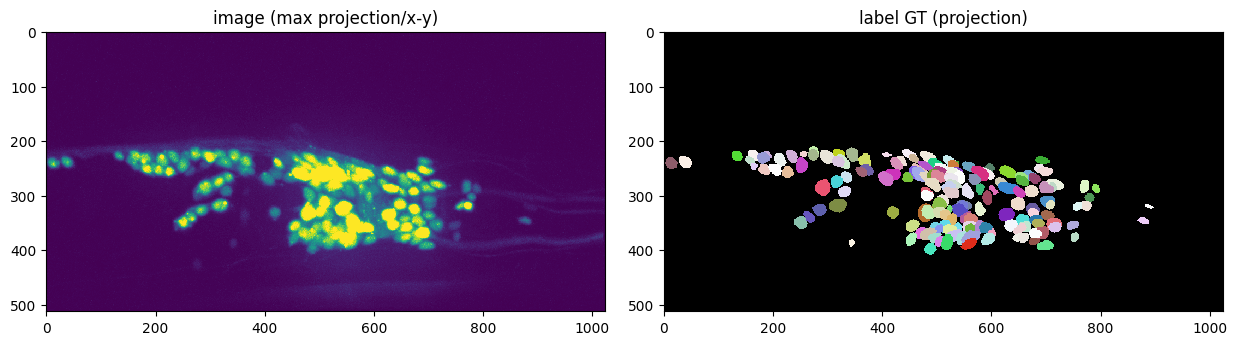

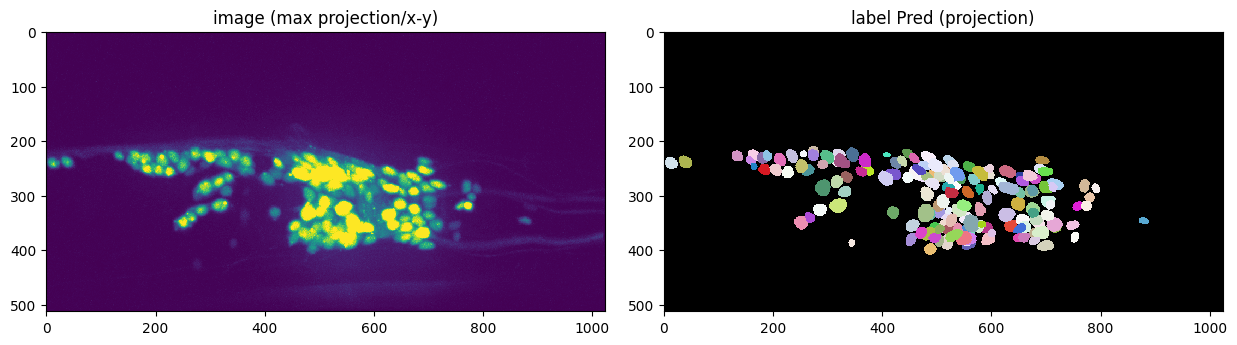

In [7]:
Y0_val_pred, prob_map = model.predict_instances(X_val[0], show_tile_progress=False)[0]
sdw.plot_img_label_max_projection(X_val[0],Y_val[0], lbl_title="label GT (projection)")
sdw.plot_img_label_max_projection(X_val[0],Y0_val_pred, lbl_title="label Pred (projection)")

Plot a GT/prediction example  